# Задание 2. Первичный анализ данных, описательная статистика и проверка гипотез

## Цель задания:
### 1. Провести анализ основных статистических показателей распределения
### 2. Проверить гипотезу о соответствии распределения исследуемого признака нормальному закону
### 3. Получить интервальные оценки основных параметров распределения
### 4. Провести проверку гипотез относительно значениий основных параметров распределения, а также сравнить две выборки

## 1. Загрузка библиотек

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats # библиотека статистических методов
from statsmodels.stats import diagnostic # библиотека статистических методов 

In [2]:
import matplotlib.pyplot as plt # графическая библиотека
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
pd.set_option('display.max_colwidth',0)# опция позволяет читать текстовые поля в "необрезанном виде"

## 2. Загрузка необходимых файлов

In [5]:
path='/Users/massimozharkovsky/Documents/ML/Econometrics/'

In [6]:
imf=pd.read_csv(path+'imf.csv',encoding='latin-1')# загрузка данных IMF в dataframe

In [7]:
imf.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
       'Country/Series-specific Notes', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', 'Estimates Start After', 'continent',
       'sub_region'],
      dtype='object')

In [8]:
imf.shape # размерность dataframe

(8730, 56)

In [9]:
ind=pd.read_csv(path+'indicators.csv')#загрузка базы индикаторов в dataframe

In [10]:
ind[ind.Source=='imf']# фильтр индикаторов по источнику - IMF

,Code,Indicator,Source
34,NGDP_R,"Gross domestic product, constant prices/National currency",imf
35,NGDP_RPCH,"Gross domestic product, constant prices/Percent change",imf
36,NGDP,"Gross domestic product, current prices/National currency",imf
37,NGDPD,"Gross domestic product, current prices/U.S. dollars",imf
38,PPPGDP,"Gross domestic product, current prices/Purchasing power parity; international dollars",imf
39,NGDP_D,"Gross domestic product, deflator/Index",imf
40,NGDPRPC,"Gross domestic product per capita, constant prices/National currency",imf
41,NGDPRPPPPC,"Gross domestic product per capita, constant prices/Purchasing power parity; 2011 international dollar",imf
42,NGDPPC,"Gross domestic product per capita, current prices/National currency",imf
43,NGDPDPC,"Gross domestic product per capita, current prices/U.S. dollars",imf


## 3. Выбор показателей для дальнейшего анализа и преобразование dataframe в необходимый формат

In [11]:
list_ind=list(ind.iloc[[35],0]) # в качестве исследуемого показателя выбираем темпы прироста ВВП

In [12]:
list_ind

['NGDP_RPCH']

In [13]:
imf_reduced=imf[imf['WEO Subject Code'].isin(list_ind)].drop(imf.columns[[0,3,4,5,6,7,8,53,55]],axis=1)
# далее осуществляем преобразование из широкого формата в длинный

In [14]:
imf_reduced.tail()

,ISO,WEO Subject Code,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,continent
8506,VEN,NGDP_RPCH,-4.947,-1.288,2.645,-9.856,5.223,0.867,6.080,4.801,...,-6.221,-16.456,-14.000,-18.000,-5.000,-2.000,-1.500,-1.500,-1.500,Americas
8551,VNM,NGDP_RPCH,-3.497,5.797,8.150,7.093,8.397,5.619,3.357,2.549,...,6.679,6.211,6.812,6.600,6.500,6.500,6.500,6.500,6.500,Asia
8596,YEM,NGDP_RPCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-16.678,-13.621,-5.942,-2.646,14.709,13.044,8.336,6.569,6.591,Asia
8641,ZMB,NGDP_RPCH,3.854,6.631,-2.912,-1.145,-1.718,1.237,1.698,1.491,...,2.920,3.757,3.396,3.816,4.478,4.488,4.500,4.512,4.525,Africa
8686,ZWE,NGDP_RPCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.424,0.665,3.737,3.636,4.202,4.729,4.840,5.008,5.000,Africa


In [15]:
col_=[str(i) for i in range(1980,2018)]
imf_long=pd.melt(imf_reduced,id_vars=['ISO','continent'],value_vars=col_)

In [16]:
imf_long.head()

,ISO,continent,variable,value
0,AFG,Asia,1980,NaN
1,ALB,Europe,1980,2.684
2,DZA,Africa,1980,-5.400
3,AGO,Africa,1980,2.406
4,ATG,Americas,1980,8.161


In [17]:
imf_long.columns=['Country','Continent','Year','Growth']

In [18]:
imf_long.head()

,Country,Continent,Year,Growth
0,AFG,Asia,1980,NaN
1,ALB,Europe,1980,2.684
2,DZA,Africa,1980,-5.400
3,AGO,Africa,1980,2.406
4,ATG,Americas,1980,8.161


In [19]:
imf_long.dtypes

Country      object
Continent    object
Year         object
Growth       object
dtype: object

In [20]:
imf_long['Growth']=imf_long['Growth'].apply(lambda x:str(x).replace(',',''))
imf_long['Growth']=pd.to_numeric(imf_long['Growth'],errors='coerce')
imf_long['Year']=pd.to_numeric(imf_long['Year'],errors='coerce')
# преобразование полей с номером года и значением показателя в числовой тип

In [21]:
GDP_growth=imf_long[imf_long.Year==2016].drop(columns=['Year'])

In [22]:
GDP_growth.head()

,Country,Continent,Growth
6984,AFG,Asia,2.164
6985,ALB,Europe,3.352
6986,DZA,Africa,3.200
6987,AGO,Africa,-2.580
6988,ATG,Americas,5.348


## 4. Описательная статистика

In [23]:
GDP_growth.isnull().sum()# определение количества значений nan для каждого поля

Country      0
Continent    1
Growth       1
dtype: int64

In [24]:
GDP_growth[GDP_growth.Growth.isnull()] # идентификация nan значений в конкретном поле

,Country,Continent,Growth
7152,SYR,Asia,NaN


In [25]:
GDP_growth[GDP_growth.isnull().any(axis=1)]

,Country,Continent,Growth
7074,UVK,NaN,4.062
7152,SYR,Asia,NaN


In [26]:
GDP_growth.dropna(inplace=True) # удаляем строки с хотя бы одним значением nan
# существуют и другие стратегии работы с nan значениями, например, замена nan средним значением ряда

In [27]:
GDP_growth.isnull().sum()

Country      0
Continent    0
Growth       0
dtype: int64

In [28]:
GDP_growth.Growth.describe() # описательная статистика

count    192.000000
mean     2.605068  
std      3.765743  
min     -16.456000 
25%      1.413500  
50%      2.932000  
75%      4.402250  
max      13.062000 
Name: Growth, dtype: float64

In [29]:
np.mean(GDP_growth.Growth) # среднее значение, подсчитанное с помощью функции библиотеки numpy

2.605067708333334

In [30]:
np.median(GDP_growth.Growth) # медианное значение

2.932

In [31]:
stats.mode(GDP_growth.Growth).mode[0] # модальное значение, используем библиотеку scipy

2.157

In [32]:
stats.kurtosis(GDP_growth.Growth) # значение коэффициента эксцесса

6.537022340846876

In [33]:
stats.skew(GDP_growth.Growth) # значение коэффициента ассиметрии

-1.6059584580289124

### Основные выводы:  распределение носит островершинный харктер и имеет левостороннюю ассиметрию (вероятность найти страну со  значением темпов прироста ВВП выше среднего больше чем вероятность найти страну со  значением темпов прироста ВВП ниже среднего) 

## 5. Визуализация распределения

### Гистограмма распределения и эмпирическая кривая (полигон)

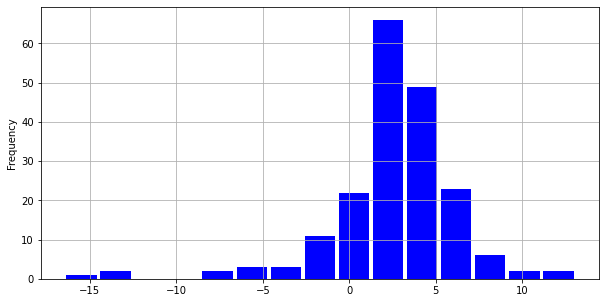

In [34]:
GDP_growth.Growth.plot(kind='hist',grid=True, bins=15, rwidth=0.9,
                   color='blue',figsize=(10,5))

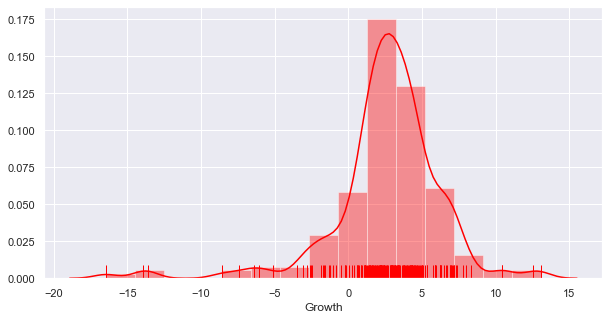

In [35]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(GDP_growth.Growth,bins=15,rug=True,color='red');

### Q-Q plot - показывает расхождение эмпирических и теоретических процентных точек распределения

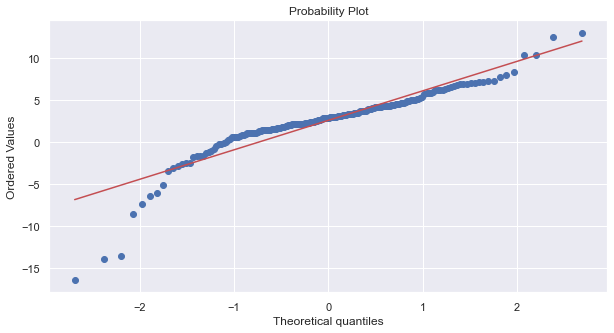

In [36]:
fig = plt.figure(figsize=(10,5))
stats.probplot(GDP_growth.Growth, dist="norm",plot=plt)
plt.show()

## 6.Проверка нормальности распределения (уровень значимости $\alpha=0.05$)

In [37]:
stats.normaltest(GDP_growth.Growth) #  тест Д'Агостино (основан на значениях эксцесса и ассиметрии )

NormaltestResult(statistic=83.90240351269773, pvalue=6.037047153523196e-19)

In [38]:
stats.shapiro(GDP_growth.Growth) #тест Шапиро-Вилкоксона

ShapiroResult(statistic=0.8679784536361694, pvalue=6.8156981794520455e-12)

In [39]:
diagnostic.normal_ad(GDP_growth.Growth) #тест Андерссона-Дарлинга

(5.830309862560057, 2.116762236185676e-14)

In [40]:
diagnostic.kstest_normal(GDP_growth.Growth)#тест Колмогорова-Смирнова

/Users/massimozharkovsky/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


(0.15032893812864204, 2.0921608494149673e-11)

### Основные выводы: представленное распределение существенно отличается от нормального закона, что подтверждается значениями критериев.

## 7. Интервальное оценивание

In [41]:
alpha=0.05 #устанавливаем значение ошибки первого рода (обратная величина к доверительной вероятности)
# для целец проверки гипотез и построения доверительных интервалов

In [42]:
n=len(GDP_growth.Growth)# размер выборки 

In [43]:
stats.norm.ppf(1-alpha/2)# значение Zкр для двусторонней области - нормальное распределение

1.959963984540054

In [44]:
stats.t.ppf(1-alpha/2,n-1)# значение tкр для двусторонней области - распределение Стьюдента (справочно для сравнения)

1.9724619897643145

In [45]:
delta=(np.std(GDP_growth.Growth)/n**0.5)*stats.norm.ppf(1-alpha/2)
print ('%.4f'%delta)
# значение дельты для определения границ интервальной оценки

0.5313


In [46]:
mean_lower_bound=np.mean(GDP_growth.Growth)-delta
mean_upper_bound=np.mean(GDP_growth.Growth)+delta
print("mean_lower_bound:%.4f,mean_upper_bound:%.4f"%(mean_lower_bound,mean_upper_bound))
# значение нижней и верхней  границ интервала математического ожидания

mean_lower_bound:2.0738,mean_upper_bound:3.1363


In [47]:
stats.chi2.ppf(alpha/2,n-1)# значение chi2 для расчета верхней границы интервала

154.6208497016246

In [48]:
stats.chi2.ppf(1-alpha/2,n-1)# значение chi2 для расчета нижней границы интервала

231.1648990081592

In [49]:
np.var(GDP_growth.Growth)# значение дисперсии исследуемого показателя

14.106960281873912

In [50]:
var_lower_bound=((n-1)*np.var(GDP_growth.Growth))/stats.chi2.ppf(1-alpha/2,n-1)
var_upper_bound=((n-1)*np.var(GDP_growth.Growth))/stats.chi2.ppf(alpha/2,n-1)
print("var_lower_bound:%.4f,var_upper_bound:%.4f"%(var_lower_bound,var_upper_bound))
# значение нижней и верхней  границ интервала дисперсии

var_lower_bound:11.6559,var_upper_bound:17.4260


## 8. Анализ выбросов (экстремальных значений)

### Для оценки выбросов сущетвуют специальные критерии (например, критерий Смирнова-Граббса). В нашем случае ограничимся рассмотрением первых k и последних k наблюдений

In [51]:
index_l=list(GDP_growth.Growth.nlargest(10).index)# индексы первых k стран по значению темпов прироста ВВП

In [52]:
index_l

[7063, 7062, 7052, 7105, 7025, 7040, 7171, 7059, 7003, 6997]

In [53]:
GDP_growth.loc[index_l,:] # первые k стран по значению темпов роста ВВП

,Country,Continent,Growth
7063,IRQ,Asia,13.062
7062,IRN,Asia,12.518
7052,GIN,Africa,10.458
7105,NRU,Oceania,10.404
7025,CIV,Africa,8.342
7040,ETH,Africa,8.000
7171,UZB,Asia,7.800
7059,ISL,Europe,7.352
7003,BTN,Asia,7.316
6997,BGD,Asia,7.202


In [54]:
index_s=list(GDP_growth.Growth.nsmallest(10).index)# индексы последних k стран по значению темпов прироста ВВП

In [55]:
GDP_growth.loc[index_s,:]#  последние k стран по значению темпов прироста ВВП

,Country,Continent,Growth
7173,VEN,Americas,-16.456
7142,SSD,Africa,-13.933
7175,YEM,Asia,-13.621
7036,GNQ,Africa,-8.576
7082,LBY,Africa,-7.389
7017,TCD,Africa,-6.431
7160,TTO,Americas,-6.076
7149,SUR,Americas,-5.139
7007,BRA,Americas,-3.469
6994,AZE,Asia,-3.100


In [56]:
index_outliers=index_l+index_s# общий список для стран с наименьшими и наибольшими значениями тепмпов роста ВВП

In [57]:
GDP_growth_reduced=GDP_growth.drop(index=index_outliers)# dataframe без стран с наименьшими и наибольшими значениями тепмпов роста ВВП

In [58]:
stats.shapiro(GDP_growth_reduced.Growth)# тест Шапиро для усеченной dataframe

ShapiroResult(statistic=0.9833655953407288, pvalue=0.03781586140394211)

## 9.1. Проверка гипотезы относительно различия средних темпов прироста двух континентов

In [59]:
pd.concat([GDP_growth[GDP_growth.Continent=='Africa']['Growth'].describe().rename('Africa'),
           GDP_growth[GDP_growth.Continent=='Asia']['Growth'].describe().rename('Asia')],axis=1)
# Сравнение распределения показателей средних темпов прироста ВВП Азии и Африки

,Africa,Asia
count,54.000000,48.000000
mean,2.508037,3.607208
std,4.342461,4.055219
min,-13.933000,-13.621000
25%,1.112500,1.945000
50%,3.739500,3.431000
75%,4.819250,6.202750
max,10.458000,13.062000


### 1.Проверим гипотезу равенства средних значений (равенство понимается в статистическом смысле),  уровень значимости $\alpha$=0.05
$$H_0:\mu_0=\mu_1$$
$$H_1:\mu_0\neq\mu_1$$  

<font size='5'>Welch's test </font>
<font size='5'> $t=\frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2})^\frac{1}{2}}$</font>

<font size='5'>Число степеней свободы </font>

<font size='5'>$\nu=\frac{(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2})^2}{\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}}$</font>

In [60]:
stats.ttest_ind(GDP_growth[GDP_growth.Continent=='Africa']['Growth'],GDP_growth[GDP_growth.Continent=='Asia']['Growth'],
                equal_var=False)
# Welch's test - сравнение средних значений двух выборок 

Ttest_indResult(statistic=-1.3215212209803235, pvalue=0.18935082368961664)

In [61]:
mean1=np.mean(GDP_growth[GDP_growth.Continent=='Africa']['Growth'])
mean2=np.mean(GDP_growth[GDP_growth.Continent=='Asia']['Growth'])   
var1=np.var(GDP_growth[GDP_growth.Continent=='Africa']['Growth'])
var2=np.var(GDP_growth[GDP_growth.Continent=='Asia']['Growth'])
n1=len(GDP_growth[GDP_growth.Continent=='Africa']['Growth'])
n2=len(GDP_growth[GDP_growth.Continent=='Asia']['Growth'])

In [62]:
mean1,mean2,var1,var2,n1,n2

(2.5080370370370364,
 3.6072083333333325,
 18.507763294924544,
 16.10219870659722,
 54,
 48)

In [63]:
t_=(mean1-mean2)/((var1/n1+var2/n2)**0.5)
print('t_=%.2f'%t_)
# Welch's test - считаем вручную

t_=-1.33


In [64]:
nu=((var1/n1+var2/n2)**2)/(((var1**2)/((n1**2)*(n1-1)))+((var2**2)/((n2**2)*(n2-1))))
print('nu=%.2f'%nu)
# число степеней свободы df

nu=99.76


In [65]:
stats.t.ppf(0.18935082368961664/2,nu)
# самопроверка соответствия результатов

-1.321520150567727

In [66]:
2*stats.t.cdf(t_,nu)
# самопроверка соответствия результатов

0.18500966470386607

### Вывод: Так как pvalue>$\alpha$ или, что, то же самое, критическое значение критерия меньше табличного значения, гипотеза $H_0$ не отвергается. Другими словами, различия в темпах прироста ВВП двух континентов статистически незначимы.

### 2.Проверим гипотезу о равенстве дисперсий,                                                                                                   уровень значимости $\alpha$=0.05
$$H_0:\sigma_0^2=\sigma_1^2$$
$$H_1:\sigma_0^2\neq\sigma_1^2$$  

In [67]:
stats.levene(GDP_growth[GDP_growth.Continent=='Africa']['Growth'],GDP_growth[GDP_growth.Continent=='Asia']['Growth'],
                center='mean')
# Levene's test - сравнение дисперсий двух выборок 

LeveneResult(statistic=0.27446783328079305, pvalue=0.6015095459788419)

<font size='5'>Levene's test</font>     
<font size='5'>$W=\frac{(N-k)}{(k-1)}\frac{\sum_{i=1}^{k}N_i(\bar{Z_i}-\bar{Z_{..}})^2}
{\sum_{i=1}^{k}\sum_{j=1}^{N_i}(Z_{ij}-\bar{Z_i})^2}$ </font>                                            

<font size='5'>$Z_{ij}=|Y_{ij}-\bar{Y_i}|$<font size='5'>

<font size='5'>$\bar{Z_{..}}$ - общая средняя по двум группам <font size='5'>

In [68]:
Z1=np.abs(GDP_growth[GDP_growth.Continent=='Africa']['Growth']-mean1)
Z2=np.abs(GDP_growth[GDP_growth.Continent=='Asia']['Growth']-mean2)
meanZ=np.mean(np.hstack((Z1,Z2)))
W=(np.sum(np.hstack((n1*(np.mean(Z1)-meanZ)**2,n2*(np.mean(Z2)-meanZ)**2)))
 /np.sum(np.hstack(((Z1-np.mean(Z1))**2,(Z2-np.mean(Z2))**2))))*((n1+n2-2)/(2-1))
# расчет теста вручную 

In [69]:
W

0.2744678332807915

In [70]:
np.hstack((n1*(np.mean(Z1)-meanZ)**2,n2*(np.mean(Z2)-meanZ)**2))

array([1.16059736, 1.30567202])

In [71]:
np.hstack((Z1,Z2))

array([ 0.69196296,  5.08803704,  1.46096296,  1.80696296,  3.40696296,
        3.55003704,  2.19796296,  2.13996296,  2.02296296,  8.93903704,
        0.35103704,  0.10803704,  5.33703704,  5.83396296,  3.99196296,
        1.83896296, 11.08403704,  0.65803704,  1.13903704,  5.49196296,
        0.42603704,  2.10203704,  1.21396296,  7.94996296,  3.75496296,
        3.36096296,  0.55296296,  4.13803704,  9.89703704,  1.67196296,
        0.23803704,  3.25496296,  0.68803704,  1.32996296,  1.38203704,
        1.25496296,  1.80803704,  2.34896296,  4.12503704,  3.47396296,
        1.67096296,  3.71996296,  1.99496296,  3.78896296,  1.87196296,
        1.94303704, 16.44103704,  0.48596296,  4.44496296,  2.59196296,
        1.40003704,  0.18503704,  1.24896296,  1.84303704,  1.44320833,
        3.34620833,  6.70720833,  0.14520833,  3.59479167,  3.70879167,
        6.07220833,  3.34579167,  3.11279167,  0.20720833,  0.75820833,
        1.44420833,  3.50579167,  1.42579167,  8.91079167,  9.45

In [72]:
1-stats.f.cdf(W,2-1,n1+n2-2)
# самопроверка  соответствия результатов

0.6015095459788429

In [73]:
stats.f.ppf(1-alpha,2-1,n1+n2-2)
# критическое значение F-критерия

3.9361429863126487

### Вывод: Так как pvalue>$\alpha$, гипотеза $H_0$ не отвергается. Это подтверждает вывод об отсутствии статистических различий в распределении темпов прироста ВВП двух континентов.

## 9.2.Проверка гипотезы о равенстве среднего значения темпа прироста ВВП нулю

###  Уровень значимости $\alpha$=0.05
$$H_0:\mu=0$$

### Конкурирующая гипотеза - среднее значение темпа прироста ВВП больше нуля
$$H_1:\mu>0$$  

In [74]:
stats.ttest_1samp(GDP_growth[GDP_growth.Continent=='Asia']['Growth'],0, alternative='greater')
#Z-test правосторонняя критическая область

Ttest_1sampResult(statistic=6.162792760559224, pvalue=7.628048365925913e-08)

In [75]:
t_=mean2/((var2/(n2-1))**.5)
pvalue=(1-stats.t.cdf(t_,n2-1))
print('t_=%.2f,pvalue=%.10f'%(t_,pvalue))# правостороняя критическая область
#Z-test  - расчет вручную

t_=6.16,pvalue=0.0000000763


In [76]:
stats.t.ppf(0.95, n2-1)
# критическое значение Стьюдента для правосторонней критической области  

1.67792672077558

### Вывод: Так как pvalue<$\alpha$, гипотеза $H_0$ не принимается. Средний темп прироста ВВП статистически значимо отличается от нуля.

## 9.3. Проверка гипотезы относительно разницы средних темпов прироста между двумя периодами. Сравнение распределения показателей средних темпов прироста ВВП Азии в 2000г. и 2016 г.

In [77]:
GDP_growth_Asia=imf_long[((imf_long.Year==2000)|(imf_long.Year==2016))
                         &(imf_long.Continent=='Asia')].drop(columns=['Continent'])

In [78]:
GDP_growth_Asia.head()

,Country,Year,Growth
3880,AFG,2000,NaN
3886,ARM,2000,5.853
3890,AZE,2000,6.227
3892,BHR,2000,7.018
3893,BGD,2000,5.600


In [79]:
GDP_growth_Asia.isnull().sum()

Country    0
Year       0
Growth     4
dtype: int64

In [80]:
GDP_growth_Asia.dropna(inplace=True)

### Проверим гипотезу равентсва средних значений,                                                                                     уровень значимости $\alpha$=0.05
$$H_0:\mu_0=\mu_1$$
$$H_1:\mu_0\neq\mu_1$$  

In [81]:
pd.concat([GDP_growth_Asia[GDP_growth_Asia.Year==2000]['Growth'].describe().rename('2000'),
          GDP_growth_Asia[GDP_growth_Asia.Year==2016]['Growth'].describe().rename('2016')],axis=1)
# Сравнение распределения показателей средних темпов роста ВВП Азии в 2000г. и 2016 г.

,2000,2016
count,46.000000,48.000000
mean,6.262870,3.607208
std,3.559341,4.055219
min,-4.341000,-13.621000
25%,4.422250,1.945000
50%,6.204500,3.431000
75%,8.232000,6.202750
max,18.587000,13.062000


In [82]:
stats.ttest_ind(GDP_growth_Asia[GDP_growth_Asia.Year==2000]['Growth'],GDP_growth_Asia[GDP_growth_Asia.Year==2016]['Growth'],
                equal_var=False)
# Welch's test - проверка равенства средних значений двух выборок 

Ttest_indResult(statistic=3.378116234153487, pvalue=0.0010743884243988315)

### Вывод: Так как pvalue<$\alpha$, гипотеза $H_0$ не принимается. Существует статистически значимое различие в темпах прироста ВВП в двух рассматриваемых периодах.

### Проверим гипотезу равентсва дисперсий,                                                                                                    уровень значимости $\alpha$=0.05
$$H_0:\sigma_0^2=\sigma_1^2$$
$$H_1:\sigma_0^2\neq\sigma_1^2$$  

In [83]:
stats.levene(GDP_growth_Asia[GDP_growth_Asia.Year==2000]['Growth'],GDP_growth_Asia[GDP_growth_Asia.Year==2016]['Growth'],
                center='mean')
# Levene's test - проверка равенства средних значений двух выборок 

LeveneResult(statistic=0.318582508714576, pvalue=0.5738343136180002)

### Вывод: Так как pvalue>$\alpha$, гипотеза $H_0$ не отвергается. Данная гипотеза является дополнительной, и в данном случае не влияет на окончательный вывод.

## Задание

### 1. Осуществить загрузку данных и их преобразование в необходимый формат
### 2. Получить описательную статистику
### 3. Визуализировать эмпирическое распределение и проверить гипотезу соответствия распределения нормальному закону
### 4. Построить интервальные оценки для математического ожидания и дисперсии
### 5. Сравнить средние и дисперсии двух выборок (проверить соответствующие гипотезы), а также проверить гипотезу равенства нулю средних темпов роста ВВП
### 6. Сделать выводы